In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')



/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

######## FOR KMEANS CENTROIDS
runs_kmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "margin", "kmeans",1000, 30, 0.01, "Adam"])
print(len(runs_kmeans))
run_ids_kmeans = get_run_ids(runs_kmeans)

10


In [3]:
######## FOR W_KMEANS CENTROIDS
runs_wkmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "margin", "w_kmeans", 1000, 30, 0.01, "Adam"])
print(len(runs_wkmeans))
run_ids_wkmeans = get_run_ids(runs_wkmeans)

10


In [4]:
samples_labeled_kmeans, avg_accs_kmeans = get_labeledSamples_avgAcc(run_ids_kmeans, tracking)
samples_labeled_wkmeans, avg_accs_wkmeans = get_labeledSamples_avgAcc(run_ids_wkmeans, tracking)

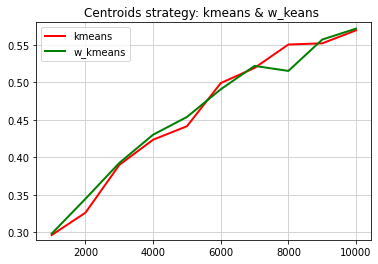

In [5]:
# plot
plt.plot(samples_labeled_kmeans, avg_accs_kmeans,color='red', label='kmeans', linewidth=2)
plt.plot(samples_labeled_wkmeans, avg_accs_wkmeans,color='green', label='w_kmeans', linewidth=2)
plt.legend()
plt.title(f"Centroids strategy: kmeans & w_keans ")
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])
plt.show()

In [6]:
avg_accs_kmeans

array([0.29632, 0.32619, 0.38987, 0.4235 , 0.44144, 0.499  , 0.51924,
       0.55047, 0.55201, 0.56939])

In [7]:
avg_accs_wkmeans

array([0.29816, 0.34472, 0.39248, 0.43019, 0.4538 , 0.49076, 0.52191,
       0.51525, 0.55704, 0.57167])